In [44]:
## Created: 5/27/22
## last edited: 5/29/22
## Status: Full 3D plots currently not working, but the goal is to be able to plot a 
##         3D reconstruction of TC sam's eyewall and rainbands! Slices of 3D plots are working and 
##         are saved in the figures folder under tdr... the mayavi package is working which might let me plot 3D shapes!

import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr
import datetime 
import warnings
# from mayavi import mlab
import math
from matplotlib import cm

os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots

In [45]:
# import and mess with data

os.chdir( "/Users/etmu9498/research/data/tdr/sam/3d")

tdr1 = xr.open_dataset( "210926H1_2237_xy.nc")
tdr2 = xr.open_dataset( "210926H1_2350_xy.nc")
tdr3 = xr.open_dataset( "210926H1_2457_xy.nc")

# print( np.shape( tdr1.x))
# print( np.shape( tdr1.y))
# print( np.shape( tdr1.level))
# print( np.shape( tdr1.REFLECTIVITY))

print( np.shape( tdr1.REFLECTIVITY.isel(time=0)))
print( np.shape( tdr1.LONGITUDE.isel(time=0)))
print( np.shape( tdr1.LATITUDE.isel(time=0)))


# print( np.shape( tdr1.LONGITUDE.isel(time=0).isel(y=125)))
# print( np.linspace( 90, 160, num=15))
# print( tdr1.level)
# print( xr.DataArray.to_numpy( tdr1.x)) # this conversion actually isn't necessary but is cool!
# tdr1

(250, 250, 37)
(250, 250)
(250, 250)


In [3]:
# plot 2D cross sections to see if things match older TDR plots
plt.figure(figsize=(18,4))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

for ind_y in np.linspace( 90, 160, num = 15, dtype=int):

    plt.pcolormesh( tdr1.LONGITUDE.isel(time=0).isel(y=ind_y), tdr1.level, 
                   tdr1.REFLECTIVITY.isel(time=0).isel(y=ind_y).transpose(), cmap=color_map,
                   vmin=-10, vmax=40)
    plt.ylabel( 'Height (km)')
    plt.xlabel( "longitude (degrees)")
    plt.xlim( [-52, -49])
    plt.grid( 'on')
    plt.colorbar(label="Reflectivity ( dBz)")
    plt.title( "TC Sam, 9/26/22 eye pass 1, 3D cross sectional slices")
    
    os.chdir( "/Users/etmu9498/research/figures/3d-tdr")
    # os.chdir( "/Users/etmu9498/research/figures/3d-tdr-eye-zoom")
    plt.savefig( "tdr-scan-" + str( ind_y) + '.png', bbox_inches=0)
    os.chdir( "/Users/etmu9498/research/code")
    
    plt.clf()


<Figure size 1296x288 with 0 Axes>

In [18]:
# plot 2D cross sections with slices at each height level in lat lon space to see overhead storm structure!

plt.figure(figsize=(7,12))
color_map = plt.cm.get_cmap( "RdYlBu").reversed()

for ind_height in range( len( tdr1.level)):

    plt.pcolormesh( tdr1.x, tdr1.y, tdr1.REFLECTIVITY.isel(time=0).isel(level=ind_height), cmap=color_map,
                   vmin=-10, vmax=40)
    plt.ylabel( 'Y Distance (km)')
    plt.xlabel( "X Distance (km)")
    # plt.xlim( [-52, -49])
    # plt.grid( 'off')
    plt.colorbar(label="Reflectivity ( dBz)")
    plt.title( "TC Sam, 9/26/22 eye pass 1, Horizontal 3D cross sectional slices")
    
    os.chdir( "/Users/etmu9498/research/figures/3d-tdr-horiz")
    # os.chdir( "/Users/etmu9498/research/figures/3d-tdr-eye-zoom")
    plt.savefig( "tdr-scan-" + str( tdr1.level[ ind_height].values) + '.png', bbox_inches=0)
    os.chdir( "/Users/etmu9498/research/code")
    
    plt.clf()

<Figure size 504x864 with 0 Axes>

In [31]:
# older efforts to try to plot full 3d figure using matplotlib

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# # Plot the surface.
# surf = ax.plot_surface( tdr1.x, tdr1.y, tdr1.REFLECTIVITY, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter('{x:.02f}')
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

In [74]:
x = tdr1.x
y = tdr1.y
z = tdr1.level
scalar = tdr1.REFLECTIVITY.isel(time=0)

print( "goal length: " + str( np.shape( scalar)[0] * np.shape( scalar)[1] * np.shape( scalar)[2] ))

xnew = np.repeat( [x], [250*37], axis=0)
xnew = xnew.reshape( 250*250*37)


ynew = np.repeat( y, 250, axis=0)
ynew = np.repeat( [ynew], [ 37], axis=0)
ynew = ynew.reshape( 250*250*37)


znew = np.repeat( z, 250*250, axis=0)
znew = xr.DataArray.to_numpy( znew)
znew = znew.reshape( 250*250*37)

print( np.shape( xnew))
print( np.shape( ynew))
print( np.shape( znew))
print( np.shape( data))

print( xnew[0:50])
print( ynew[0:250+1])
print( znew[0:250*250+2])

goal length: 2312500
(2312500,)
(2312500,)
(2312500,)
(2312500,)
[-249. -247. -245. -243. -241. -239. -237. -235. -233. -231. -229. -227.
 -225. -223. -221. -219. -217. -215. -213. -211. -209. -207. -205. -203.
 -201. -199. -197. -195. -193. -191. -189. -187. -185. -183. -181. -179.
 -177. -175. -173. -171. -169. -167. -165. -163. -161. -159. -157. -155.
 -153. -151.]
[-249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249. -249.
 -249. -249. -249. -249. -249. -249. -249. -2

In [75]:
# load data

x = tdr1.x
y = tdr1.y
z = tdr1.level
scalar = tdr1.REFLECTIVITY.isel(time=0)

# print( np.shape( x))
# print( np.shape( y))
# print( np.shape( z))
print( np.shape( scalar))

# manipulate data to make sorting easier later

print( "goal length: " + str( np.shape( scalar)[0] * np.shape( scalar)[1] * np.shape( scalar)[2] ))

# # xnew = np.repeat( [x], [250*37], axis=0)
# ynew = np.repeat( [y], [250*37], axis=0)
# ynew = ynew.reshape( 250*250*37)

# # ynew = np.repeat( [y], [250*37], axis = 0)
# xnew = np.repeat( x, 37, axis=0)
# xnew = np.repeat( [xnew], [ 250], axis=0)
# xnew = xnew.reshape( 250*250*37)

# znew = np.repeat( [z], [250*250], axis=0)
# znew = znew.reshape( 250*250*37)

# print( np.shape( xnew))
# print( np.shape( ynew))
# print( np.shape( znew))
# print( np.shape( data))


xnew = np.repeat( [x], [250*37], axis=0)
xnew = xnew.reshape( 250*250*37)


ynew = np.repeat( y, 250, axis=0)
ynew = np.repeat( [ynew], [ 37], axis=0)
ynew = ynew.reshape( 250*250*37)


znew = np.repeat( z, 250*250, axis=0)
znew = xr.DataArray.to_numpy( znew)
znew = znew.reshape( 250*250*37)

data = xr.DataArray.to_numpy( scalar)
data = data.reshape( 250*250*37)


# trying to sort the data!
x1=[]
y1=[]
z1=[]
da1=[]

print( len( xnew))

for i in range( 250*250*37):
    if not math.isnan( data[i]):
        x1.append( xnew[ i])
        y1.append( ynew[ i])
        z1.append( znew[ i])
        da1.append( data[ i])

# for i in range( 250):
#     for j in range( 250):
#         for k in range(37):
#             if not math.isnan( scalar[i][j][k]):
#                 x1.append(x[ i])
#                 y1.append(y[ j])
#                 z1.append(z[ k])
#                 da1.append(scalar[ i][j][k])
#                 print( "1")
                
print( len( x1))
print( len( y1))
print( len( z1))
print( len( da1))
 
# print( x1[0:1000])
# print("\n\n")
# print( y1[0:1000])
# print( z1[0:10000])
# print( da1[ind])

my_cmap=cm.jet
# my_cmap.set_over('c')
# my_cmap.set_under('m')
N=da1/max(da1)
                    
# # testing sorting out nans

# print(  "\n\n\n\n")
# print( scalar[0][0][0].values)
# print( scalar[125][130][15].values)

# # this works as a nan sorting mechanism!
# if math.isnan( scalar[125][130][15].values) :
#     print('nan')
# else:
#     print( "no nan")

(250, 250, 37)
goal length: 2312500
2312500
180215
180215
180215
180215


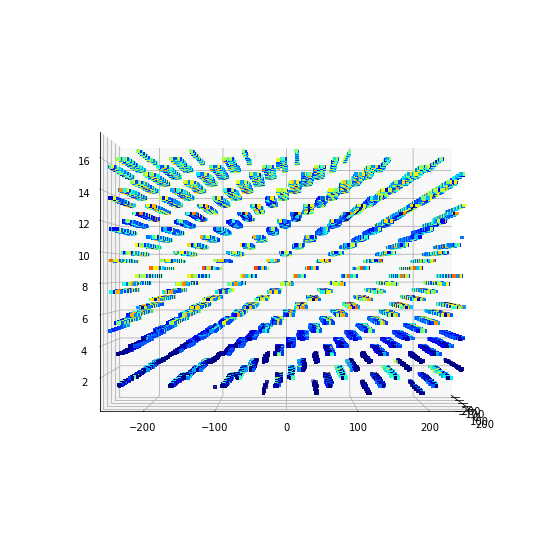

In [78]:
fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter3D( x1, y1, z1, s=7, facecolors=my_cmap(N), marker=',') # , alpha=0.8, ,lw=0)
# ax.scatter3D( x1[0:20], y1[0:20], z1[0:20], s=1, alpha=0.8, marker=',', facecolors=my_cmap(N[0:20]) ) # ,lw=0)
plt.xlim([-250, 250])
plt.ylim([-250, 250])
ax.view_init(0, 0)
# ax.colorbar(mappable=my_cmap(N))

In [ ]:
x1=[]
y1=[]
z1=[]
da1=[]

counter = 0
for i in range( 250):
    for j in range( 250):
        for k in range( 37):
            if math.isnan( scalar[i][j][k].values):
                x1.append(x[ counter])
                y1.append(y[ counter])
                z1.append(z[ counter])
                da1.append(data[ counter])
                print( counter)
                
            counter = counter + 1
my_cmap=cm.jet
my_cmap.set_over('c')
my_cmap.set_under('m')
N=da1/max(da1)
                
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter3D(x, y, z, s=6, alpha=0.8, marker=',') # , facecolors=scalar, lw=0)

In [34]:
# testing if the mayavi package installation worked... it did!!

# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
s = mlab.mesh(x, y, z)
mlab.show()

In [44]:
# mayavi package test 2

def test_contour3d():
    x, y, z = np.ogrid[-5:5:64j, -5:5:64j, -5:5:64j]
    # print(x)
    # print(y)
    # print(z)

    scalars = x * x * 0.5 + y * y + z * z * 2.0
    # print(scalars)
    
    obj = contour3d(scalars, contours=4, transparent=True)
    mlab.show()
    return obj

test_contour3d()

In [71]:
# trying to plot full 3d figure using mayavi

# x = tdr1.x
# y = tdr1.y
# z = tdr1.level
# scalar = tdr1.REFLECTIVITY.isel(time=0)

# obj2 = contour3d( x, y, z, scalar) # scalar)

In [52]:
# More matplotlib trials with fake data

X = np.array( [ [ 0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]] )
Y = np.array( [ [ 0, 1, 2], [3, 4, 5], [6, 7, 8]] )
Z = np.array( [ [ 0, 1, 2], [3, 4, 5], [6, 7, 8]] )

print( np.shape( X))

aa=np.shape(X)[0]
bb=np.shape(X)[1]
x=X.reshape(aa*bb)
# y=Y.reshape(aa*bb)
# z=Z.reshape(aa*bb)

print( aa)
print( bb)
print( x)
print( y)
print( z)

data=data.reshape(aa*bb)
x1=[]
y1=[]
z1=[]
da1=[]
for i in range(aa*bb):
    if data[i]>0:
        x1.append(x[i])
        y1.append(y[i])
        z1.append(z[i])
        da1.append(data[i])
my_cmap=cm.jet
my_cmap.set_over('c')
my_cmap.set_under('m')
N=da1/max(da1)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter3D(x1,y1,z1,s=6,alpha=0.8,marker=',',facecolors=my_cmap(N),lw=0)



(4, 3)
4
3
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]


NameError: name 'data' is not defined